**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

In [1]:
import sys
sys.executable

'/Users/kuojouhsiang/Documents/DM2025-Lab2-Exercise/.venv/bin/python'

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [7]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [8]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [9]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [10]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [11]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [12]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [13]:
# Answer here
#gemini-2.5-flash-lite
input_prompt = ["What kind of methods that can be used to tune a large language model?"]
text_response1, logs1 = prompt_gemini(input_prompt = input_prompt,model_name="gemini-2.5-flash-lite", with_tokens_info = True)
display(Markdown("# ===== gemini-2.5-flash-lite Output ====="))
display(Markdown(text_response1))
print(logs1)
    

# ===== gemini-2.5-flash-lite Output =====

Tuning a large language model (LLM) is crucial for adapting its general capabilities to specific tasks, domains, or desired behaviors. Here's a breakdown of the common methods used for LLM tuning, categorized for clarity:

**I. Fine-tuning (The Most Common Approach)**

Fine-tuning involves taking a pre-trained LLM and further training it on a smaller, task-specific dataset. This allows the model to learn new patterns and nuances relevant to the target application.

*   **Full Fine-tuning:**
    *   **Description:** All parameters of the pre-trained LLM are updated during training.
    *   **Pros:** Can achieve the best performance for the specific task as the entire model adapts.
    *   **Cons:** Computationally expensive, requires significant memory, and can lead to catastrophic forgetting (where the model loses its general capabilities).
    *   **When to use:** When maximum performance on a specific task is paramount and computational resources are not a major constraint.

*   **Parameter-Efficient Fine-tuning (PEFT):** These methods aim to reduce the number of trainable parameters, making fine-tuning more efficient in terms of computation, memory, and storage.

    *   **LoRA (Low-Rank Adaptation):**
        *   **Description:** Injects trainable low-rank matrices into specific layers of the pre-trained model. Only these low-rank matrices are trained, while the original model weights remain frozen.
        *   **Pros:** Significantly reduces the number of trainable parameters, faster training, smaller storage footprint for adapters, less prone to catastrophic forgetting.
        *   **Cons:** Might not reach the absolute peak performance of full fine-tuning in all cases.
        *   **When to use:** A very popular and effective method for most fine-tuning tasks, especially when dealing with limited resources or when deploying multiple task-specific models.

    *   **Adapter Layers:**
        *   **Description:** Inserts small, trainable "adapter" modules between the layers of the pre-trained LLM. The original LLM weights are frozen.
        *   **Pros:** Similar benefits to LoRA in terms of efficiency and reduced forgetting.
        *   **Cons:** Can introduce slight latency due to the added layers.
        *   **When to use:** Another good PEFT option, often compared to LoRA.

    *   **Prefix Tuning / P-Tuning:**
        *   **Description:** Learns a small, continuous "prefix" or "prompt" that is prepended to the input sequence. The LLM's weights are frozen.
        *   **Pros:** Very parameter-efficient, can be effective for certain tasks.
        *   **Cons:** Can be less flexible than LoRA or adapters for complex tasks.
        *   **When to use:** When you want to steer the model's behavior without modifying its core weights, often for tasks like text generation or classification.

    *   **Prompt Tuning:**
        *   **Description:** Similar to prefix tuning, but learns a set of trainable "soft prompts" that are prepended to the input. The LLM's weights are frozen.
        *   **Pros:** Extremely parameter-efficient, can be very effective for specific tasks.
        *   **Cons:** The learned prompts are not human-readable.
        *   **When to use:** When you need to adapt the model with minimal computational overhead and are comfortable with learned, non-interpretable prompts.

    *   **QLoRA:**
        *   **Description:** An optimization of LoRA that quantizes the pre-trained model to 4-bit precision, further reducing memory usage and enabling fine-tuning of very large models on consumer hardware.
        *   **Pros:** Enables fine-tuning of massive LLMs on significantly less hardware.
        *   **Cons:** Potential for slight degradation in performance compared to higher precision.
        *   **When to use:** When you need to fine-tune extremely large LLMs and have limited GPU memory.

**II. Instruction Tuning**

Instruction tuning focuses on training LLMs to follow instructions given in natural language. This makes them more versatile and better at zero-shot or few-shot learning.

*   **Description:** The LLM is trained on a dataset of (instruction, input, output) triplets. The goal is to teach the model to understand and execute a wide range of tasks based on textual instructions.
*   **Pros:** Improves the model's ability to generalize to unseen tasks, makes it more user-friendly, and enhances its performance in zero-shot and few-shot settings.
*   **Cons:** Requires carefully curated instruction datasets.
*   **When to use:** To create general-purpose chatbots, assistants, or models that can perform many different tasks without explicit fine-tuning for each.

**III. Reinforcement Learning from Human Feedback (RLHF)**

RLHF is a powerful technique for aligning LLM behavior with human preferences, making them safer, more helpful, and less prone to generating undesirable content.

*   **Description:**
    1.  **Supervised Fine-tuning (SFT):** A base LLM is fine-tuned on a dataset of high-quality demonstrations.
    2.  **Reward Model Training:** Human annotators rank different model outputs for the same prompt. A reward model is trained to predict these human preferences.
    3.  **Reinforcement Learning:** The LLM is further fine-tuned using reinforcement learning (e.g., PPO algorithm), where the reward model provides feedback to guide the LLM towards generating outputs that are preferred by humans.
*   **Pros:** Crucial for aligning LLMs with human values, improving safety, reducing toxicity, and enhancing helpfulness.
*   **Cons:** Complex to implement, requires significant human annotation effort, and can be computationally intensive.
*   **When to use:** To create safe, ethical, and helpful AI assistants, chatbots, and other applications where human alignment is critical.

**IV. Prompt Engineering (Not strictly "tuning" but a related adaptation method)**

While not modifying the model's weights, prompt engineering is a crucial technique for guiding LLM behavior.

*   **Description:** Carefully crafting the input prompt to elicit the desired output from the LLM. This can involve providing context, examples (few-shot learning), specifying the desired format, or using specific keywords.
*   **Pros:** No training required, quick to iterate, can be very effective for many tasks.
*   **Cons:** Can be brittle, requires experimentation, and may not be sufficient for complex or highly specialized tasks.
*   **When to use:** For quick experimentation, when you don't have the resources for fine-tuning, or to complement fine-tuned models.

**V. Other Advanced Techniques**

*   **Knowledge Distillation:** Training a smaller, "student" model to mimic the behavior of a larger, "teacher" LLM. This is useful for deploying LLMs on resource-constrained devices.
*   **Continual Learning:** Methods that allow LLMs to learn new information or adapt to new tasks over time without forgetting previously learned knowledge.
*   **Domain Adaptation:** Specifically tailoring an LLM to a particular domain (e.g., medical, legal, financial) by training on domain-specific data. This can be a form of fine-tuning.

**Choosing the Right Method:**

The best method for tuning an LLM depends on several factors:

*   **Task Complexity:** Simple tasks might be solvable with prompt engineering, while complex tasks often require fine-tuning.
*   **Data Availability:** The amount and quality of your task-specific data will influence your choice.
*   **Computational Resources:** Full fine-tuning is resource-intensive, while PEFT methods are more efficient.
*   **Desired Performance:** If peak performance is critical, full fine-tuning might be necessary, but PEFT often offers a good trade-off.
*   **Safety and Alignment Requirements:** RLHF is essential for ensuring safe and aligned behavior.
*   **Deployment Constraints:** For edge devices or mobile applications, parameter-efficient methods or distillation are preferred.

In practice, a combination of these methods is often used. For example, an LLM might first be instruction-tuned, then further fine-tuned using LoRA for a specific task, and finally aligned with human preferences using RLHF.

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 22, 'output_tokens': 1774}


In [14]:
#gemini-2.5-flash
input_prompt = ["What kind of methods that can be used to tune a large language model?"]
text_response2, logs2 = prompt_gemini(input_prompt = input_prompt,model_name="gemini-2.5-flash", with_tokens_info = True)
display(Markdown("# ===== gemini-2.5-flash Output ====="))
display(Markdown(text_response2))
print(logs2)

# ===== gemini-2.5-flash Output =====

Tuning a Large Language Model (LLM) refers to the process of adapting a pre-trained model to perform better on specific tasks, datasets, or to align its behavior with desired outcomes. This is distinct from the initial "pre-training" phase, where the model learns general language patterns from vast amounts of text.

Here's a breakdown of the main methods used to tune LLMs, ranging from full model updates to parameter-efficient techniques and behavioral alignment:

---

### 1. Full Fine-Tuning

*   **Description:** This is the most straightforward method where *all* parameters of the pre-trained LLM are updated using a new, task-specific dataset. The model continues to learn from the new data, adjusting its weights to optimize for the target task.
*   **How it works:** You take a pre-trained LLM (e.g., Llama 2, GPT-3.5), provide it with a dataset of input-output pairs relevant to your task (e.g., summarization, sentiment analysis, question answering), and train it using standard backpropagation.
*   **Pros:**
    *   Potentially achieves the highest performance on the target task, as the entire model is optimized.
    *   Can significantly adapt the model's capabilities.
*   **Cons:**
    *   **Computationally Expensive:** Requires substantial GPU memory and compute power, often comparable to pre-training for large models.
    *   **Time-Consuming:** Training can take a long time.
    *   **Storage Intensive:** Saving multiple fine-tuned versions of a large model requires a lot of disk space.
    *   **Catastrophic Forgetting:** The model might "forget" some of its general knowledge learned during pre-training, especially if the fine-tuning dataset is small or very different.
*   **When to use:** When you have ample computational resources, a high-quality and sufficiently large task-specific dataset, and require maximum performance for a critical application.

---

### 2. Parameter-Efficient Fine-Tuning (PEFT)

PEFT methods aim to reduce the computational and memory costs of fine-tuning by updating only a small subset of the model's parameters or by introducing a small number of new, trainable parameters. The vast majority of the pre-trained weights remain frozen.

*   **a. LoRA (Low-Rank Adaptation)**
    *   **Description:** LoRA injects small, trainable matrices (adapters) into the existing layers of the pre-trained model. Instead of training the original weight matrices, it trains these much smaller low-rank decomposition matrices that represent the *change* to the original weights.
    *   **How it works:** For each weight matrix $W_0$ in the original model, LoRA adds a low-rank decomposition $BA$ (where $B$ and $A$ are much smaller matrices). During fine-tuning, $W_0$ is frozen, and only $A$ and $B$ are trained. The output is then $W_0x + BAx$.
    *   **Pros:**
        *   Significantly reduces the number of trainable parameters (e.g., by 10,000x).
        *   Much faster training and lower memory footprint.
        *   Allows for easy switching between different task adaptations by loading different sets of LoRA weights.
        *   Less prone to catastrophic forgetting.
    *   **Cons:** May not always reach the absolute peak performance of full fine-tuning, though often very close.
*   **b. QLoRA (Quantized LoRA)**
    *   **Description:** QLoRA builds upon LoRA by quantizing the base pre-trained model to 4-bit precision (or similar) to further reduce memory usage during training. The LoRA adapters are then trained on top of this quantized model.
    *   **How it works:** The base model weights are loaded in a quantized format (e.g., 4-bit NormalFloat), which drastically reduces memory. A small set of LoRA adapters are then trained in higher precision (e.g., 16-bit) on top of this quantized model.
    *   **Pros:**
        *   Extremely memory efficient, enabling fine-tuning of very large models (e.g., 70B parameters) on consumer-grade GPUs.
        *   Retains most of LoRA's performance benefits.
    *   **Cons:** Potential for slight performance degradation due to the quantization of the base model.
*   **c. Prompt Tuning / Prefix Tuning / P-Tuning**
    *   **Description:** These methods involve adding a small, trainable "soft prompt" or "prefix" to the input sequence, rather than modifying the model's internal weights. The model learns to condition its output on this learned prompt.
    *   **How it works:** A sequence of trainable vectors (the soft prompt/prefix) is prepended to the input embeddings. The LLM then processes this augmented input. Only these prompt vectors are updated during training.
    *   **Pros:**
        *   Very few trainable parameters.
        *   No changes to the core model weights, making deployment and sharing easy.
    *   **Cons:** Can be less effective than adapter-based methods for complex tasks, and performance can be sensitive to the initial prompt initialization.
*   **d. Adapter-based Methods (e.g., Houlsby Adapters, Compacter)**
    *   **Description:** These methods insert small, task-specific neural network modules (adapters) between the layers of the pre-trained model. Only these adapter modules are trained, while the original model weights remain frozen.
    *   **How it works:** An adapter typically consists of a down-projection, a non-linearity, and an up-projection. When an input passes through a transformer layer, it also passes through the adapter, and the adapter's output is added to the layer's output.
    *   **Pros:**
        *   Relatively few trainable parameters compared to full fine-tuning.
        *   Can achieve good performance.
    *   **Cons:** Can add latency during inference due to the additional layers.
*   **e. IA3 (Infused Adapters by Inhibiting and Amplifying Inner Activations)**
    *   **Description:** IA3 learns a set of vectors that scale the key, value, and feed-forward activations within the transformer layers.
    *   **How it works:** Instead of adding new layers, IA3 learns simple scaling factors for specific internal activations. Only these scaling factors are trained.
    *   **Pros:** Extremely parameter-efficient, often outperforming other PEFT methods with fewer parameters.
    *   **Cons:** Can be slightly more complex to implement than LoRA.

---

### 3. Reinforcement Learning from Human Feedback (RLHF)

*   **Description:** RLHF is a powerful technique used to align LLMs with human preferences, making them more helpful, harmless, and honest. It's a multi-step process that goes beyond just task performance to focus on the quality and safety of the model's outputs.
*   **How it works:**
    1.  **Supervised Fine-Tuning (SFT):** An initial fine-tuning step on a dataset of high-quality human-written demonstrations to teach the model desired behaviors.
    2.  **Reward Model Training:** A separate "reward model" is trained to predict human preferences. This model is trained on a dataset of human comparisons, where annotators rank different LLM outputs for a given prompt.
    3.  **Reinforcement Learning:** The LLM is then fine-tuned using an RL algorithm (e.g., Proximal Policy Optimization - PPO) to maximize the reward signal from the reward model. The LLM learns to generate responses that the reward model predicts humans would prefer.
*   **Pros:**
    *   Produces highly aligned and safe models (e.g., ChatGPT, Claude).
    *   Significantly improves conversational quality, reduces hallucination, and enhances adherence to instructions.
*   **Cons:**
    *   **Extremely Complex:** Involves multiple models and training stages.
    *   **Data-Intensive:** Requires vast amounts of high-quality human preference data.
    *   **Computationally Expensive:** Training the reward model and the RL phase are resource-intensive.
    *   **Difficult to Debug:** RL training can be unstable and hard to troubleshoot.
*   **When to use:** For developing general-purpose conversational AI, chatbots, or any application where safety, helpfulness, and alignment with human values are paramount.

---

### 4. Knowledge Distillation

*   **Description:** Knowledge distillation involves training a smaller "student" model to mimic the behavior of a larger, more powerful "teacher" model. While not strictly "tuning" the teacher, it's a method to create a tuned, smaller version of an LLM.
*   **How it works:** The student model is trained not only on the ground truth labels but also on the "soft targets" (e.g., probability distributions over classes, hidden states) produced by the teacher model. This allows the student to learn the nuances and generalization capabilities of the teacher.
*   **Pros:**
    *   Creates smaller, faster, and more efficient models for deployment.
    *   Reduces inference costs.
    *   Can transfer knowledge from proprietary or very large models to smaller, open-source ones.
*   **Cons:** The student model will generally be less capable than the teacher model.

---

### 5. Prompt Engineering / In-Context Learning

*   **Description:** While not "tuning" the model's weights, prompt engineering is a crucial method to *tune the model's behavior* without any training. It involves carefully crafting input prompts to elicit desired responses from a pre-trained LLM.
*   **How it works:**
    *   **Zero-shot:** Providing only the instruction (e.g., "Translate this to French: 'Hello'").
    *   **Few-shot:** Providing a few examples within the prompt to guide the model (e.g., "English: Cat -> French: Chat. English: Dog -> French: Chien. English: Hello -> French:").
    *   **Chain-of-Thought (CoT):** Prompting the model to show its reasoning steps before giving the final answer (e.g., "Let's think step by step.").
    *   **Advanced Techniques:** Tree-of-Thought, Self-Consistency, etc.
*   **Pros:**
    *   No training required, making it extremely fast and cheap.
    *   Highly flexible and adaptable to new tasks on the fly.
    *   Leverages the vast knowledge already present in the pre-trained model.
*   **Cons:**
    *   Performance can be highly sensitive to prompt wording.
    *   Limited by the inherent capabilities of the base model.
    *   Not a true "tuning" of the model's underlying parameters.
*   **When to use:** For rapid prototyping, tasks where a small performance drop is acceptable for the sake of speed and cost, or when you don't have a large fine-tuning dataset.

---

### Key Considerations When Choosing a Method:

*   **Computational Resources:** GPUs, memory, and time.
*   **Dataset Size and Quality:** The amount and relevance of your task-specific data.
*   **Performance Requirements:** How critical is peak performance vs. cost/speed?
*   **Deployment Constraints:** Model size, inference latency, and cost.
*   **Alignment Needs:** Is it a general-purpose assistant requiring safety and helpfulness, or a specialized task model?

The choice of tuning method depends heavily on the specific use case, available resources, and desired outcomes. Often, a combination of these methods (e.g., SFT with LoRA, followed by RLHF) is used for state-of-the-art LLM development.

{'model': 'gemini-2.5-flash', 'input_tokens': 22, 'output_tokens': 2582}


---
## **Difference Between gemini-2.5-flash-lite and gemini-2.5-flash**

##### **Flash-lite**：
Delivers a more instructional and easy-to-read explanation, using simplified concepts, clear categorization, and minimal technical depth. Its tone is approachable, and the content focuses on high-level understanding. 

##### **Flash**： 
Provides a significantly more detailed, technically rich, and research-oriented answer. It includes engineering-level descriptions, mathematical notation, implementation mechanisms, and extensive domain-specific terminology, resulting in higher information density and longer output. 

In essence, Flash-lite is suited for conceptual overviews, while Flash is tailored for expert-level analysis requiring depth, precision, and comprehensive technical coverage.

| 版本                                                 | Input Tokens | Output Tokens | 總 Tokens |
| -------------------------------------------------- | ------------ | ------------- | -------- |
| **gemini-2.5-flash-lite（原始）**                      | 22           | 1774          | **1796** |
| **gemini-2.5-flash（原始）**                           | 22           | 2512          | **2534** |
---

In [15]:
# System instruction -- AI expert
input_prompt = ["What kind of methods that can be used to tune a large language model?"]
SYSTEM_INSTRUCTION = "You are an expert in AI and machine learning."
text_response1, logs1 = prompt_gemini(input_prompt = input_prompt,model_name="gemini-2.5-flash-lite", system_instruction = SYSTEM_INSTRUCTION, with_tokens_info = True)
display(Markdown("# ===== gemini-2.5-flash-lite Output ---AI expert ====="))
display(Markdown(text_response1))
print(logs1)

# ===== gemini-2.5-flash-lite Output ---AI expert =====

Tuning a large language model (LLM) is a crucial step to adapt its general capabilities to specific tasks, domains, or desired behaviors. There are several categories of methods, each with its own strengths and weaknesses. Here's a breakdown of the most common and effective approaches:

## 1. Fine-tuning (Full Fine-tuning)

This is the most traditional and comprehensive method.

*   **How it works:** You take a pre-trained LLM and continue training it on a new, task-specific dataset. This involves updating *all* the parameters of the model.
*   **Pros:**
    *   Can achieve state-of-the-art performance on the target task.
    *   Allows the model to deeply learn the nuances of the new data.
*   **Cons:**
    *   **Computationally expensive:** Requires significant GPU resources and time.
    *   **Large storage requirements:** The fine-tuned model is as large as the original pre-trained model.
    *   **Catastrophic forgetting:** The model might forget some of its general knowledge from pre-training if the fine-tuning dataset is very different or too small.
*   **When to use:** When you have a substantial amount of high-quality, task-specific data and the computational resources to support it. This is often the go-to for achieving the best possible performance on a specific downstream task.

## 2. Parameter-Efficient Fine-Tuning (PEFT) Methods

These methods aim to reduce the computational and storage costs of fine-tuning by only updating a small subset of the model's parameters or by introducing a small number of new parameters.

### a) Adapter-based Methods

*   **How it works:** Small, trainable "adapter" modules are inserted between the layers of the pre-trained LLM. Only the parameters of these adapters are trained, while the original LLM weights remain frozen.
*   **Examples:** Adapters, LoRA (Low-Rank Adaptation), QLoRA (Quantized LoRA).
*   **Pros:**
    *   Significantly reduces the number of trainable parameters.
    *   Much faster training and lower memory usage compared to full fine-tuning.
    *   Smaller storage footprint for the fine-tuned components.
    *   Less prone to catastrophic forgetting.
*   **Cons:**
    *   May not reach the absolute peak performance of full fine-tuning in all cases.
    *   Adds a slight inference latency due to the extra adapter layers.
*   **When to use:** When computational resources are limited, you need to fine-tune for many different tasks, or you want to avoid catastrophic forgetting. LoRA and QLoRA are currently very popular and effective.

### b) Prompt Tuning / Prefix Tuning

*   **How it works:** Instead of modifying the model's weights, these methods learn a small set of continuous "prompt" or "prefix" embeddings that are prepended to the input. The LLM's weights are frozen.
*   **Examples:** Prompt Tuning, Prefix Tuning, P-Tuning.
*   **Pros:**
    *   Extremely parameter-efficient (only a few hundred or thousand parameters to train).
    *   Very fast training.
    *   No modification to the original LLM architecture.
*   **Cons:**
    *   Performance can be more sensitive to initialization and hyperparameter tuning.
    *   May not be as effective as adapter-based methods for complex tasks.
*   **When to use:** For tasks where a simple prompt can effectively guide the model, and extreme parameter efficiency is paramount.

### c) LoRA (Low-Rank Adaptation)

*   **How it works:** This is a very popular PEFT method. It injects trainable low-rank decomposition matrices into specific layers (typically attention layers) of the pre-trained model. Instead of updating the full weight matrix, it updates these smaller, low-rank matrices.
*   **Pros:**
    *   Highly effective at reducing trainable parameters while maintaining performance.
    *   Can be combined with quantization (QLoRA) for even greater efficiency.
    *   Relatively easy to implement and integrate.
*   **Cons:**
    *   Still requires some computational resources, though much less than full fine-tuning.
*   **When to use:** A strong default choice for most PEFT scenarios due to its balance of efficiency and performance.

### d) QLoRA (Quantized LoRA)

*   **How it works:** An optimization of LoRA that uses quantization techniques (e.g., 4-bit NormalFloat) to further reduce memory usage. It quantizes the pre-trained model weights to a lower precision while keeping the LoRA adapters in higher precision during training.
*   **Pros:**
    *   Enables fine-tuning of very large models on consumer-grade hardware.
    *   Significant memory savings.
*   **Cons:**
    *   Potential for slight degradation in performance due to quantization, though often negligible.
*   **When to use:** When you need to fine-tune extremely large models (e.g., 65B parameters) on limited hardware.

## 3. Instruction Tuning

*   **How it works:** This is a form of fine-tuning where the model is trained on a dataset of instructions and their corresponding outputs. The goal is to teach the model to follow instructions and perform a wide range of tasks in a zero-shot or few-shot manner.
*   **Pros:**
    *   Improves the model's ability to generalize to new, unseen tasks described by instructions.
    *   Enhances conversational abilities and task completion.
*   **Cons:**
    *   Requires a diverse and well-curated instruction dataset.
    *   Can be computationally intensive if done on a large scale.
*   **When to use:** To make LLMs more versatile and better at understanding and executing user commands. Many modern LLMs are instruction-tuned.

## 4. Reinforcement Learning from Human Feedback (RLHF)

*   **How it works:** This is a multi-stage process:
    1.  **Supervised Fine-tuning (SFT):** The LLM is fine-tuned on a dataset of high-quality demonstrations.
    2.  **Reward Model Training:** Human annotators rank different model outputs for the same prompt. A separate reward model is trained to predict these human preferences.
    3.  **Reinforcement Learning:** The LLM is further fine-tuned using reinforcement learning (e.g., PPO algorithm), where the reward model provides the reward signal.
*   **Pros:**
    *   Aligns the model's behavior with human values, safety, and preferences.
    *   Can lead to more helpful, honest, and harmless outputs.
*   **Cons:**
    *   Complex and resource-intensive to implement.
    *   Requires significant human annotation effort.
    *   Can be challenging to balance reward signals effectively.
*   **When to use:** To make LLMs safer, more aligned with human intent, and to improve their helpfulness and conversational quality. This is a key technique behind models like ChatGPT.

## 5. Direct Preference Optimization (DPO)

*   **How it works:** A more recent and simpler alternative to RLHF. DPO directly optimizes the LLM on a dataset of human preferences (pairs of preferred and dispreferred responses) without needing to train a separate reward model or use complex RL algorithms.
*   **Pros:**
    *   Simpler to implement than RLHF.
    *   More stable training.
    *   Often achieves comparable or better results than RLHF.
*   **Cons:**
    *   Still requires a dataset of human preferences.
*   **When to use:** As a more efficient and stable alternative to RLHF for aligning LLMs with human preferences.

## 6. Few-Shot Learning / In-Context Learning

*   **How it works:** This isn't strictly "tuning" in the sense of updating model weights. Instead, you provide the LLM with a few examples of the task directly within the prompt. The model then uses these examples to infer the task and generate an output for a new query.
*   **Pros:**
    *   No training required, extremely fast to adapt.
    *   No computational cost for adaptation.
*   **Cons:**
    *   Performance is limited by the LLM's inherent capabilities and the quality of the few examples.
    *   Context window limitations can restrict the number of examples.
    *   Can be less robust than fine-tuning.
*   **When to use:** For quick experimentation, when you have very few examples, or when you want to leverage the LLM's existing knowledge without modifying it.

## Choosing the Right Method

The best method for tuning an LLM depends on several factors:

*   **Task Complexity:** Simple tasks might be fine with prompt tuning or few-shot learning, while complex tasks often benefit from fine-tuning.
*   **Data Availability:** Full fine-tuning requires a large dataset, while PEFT methods can work with smaller datasets. RLHF and DPO require preference data.
*   **Computational Resources:** Full fine-tuning is the most demanding, followed by adapter-based PEFT, then prompt tuning, and finally few-shot learning.
*   **Desired Performance:** For maximum performance, full fine-tuning is often the best, but PEFT methods are closing the gap.
*   **Alignment Needs:** If aligning with human values and safety is critical, RLHF or DPO are essential.
*   **Storage Constraints:** PEFT methods offer significant advantages in terms of storage.

In practice, a combination of these methods is often used. For example, a model might be instruction-tuned first, then further aligned using RLHF or DPO, and finally adapted to a specific downstream task using LoRA.

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 27, 'output_tokens': 2127}


---
## **Effect of changing System Instruction on gemini-2.5-flash-lite**

Adding the “AI expert” system instruction noticeably shifts the tone and depth of the gemini-2.5-flash-lite response. Compared to the original version, which was more conceptual, concise, and written in an instructional or introductory style. The modified output becomes significantly more technical, structured, and expert-oriented. The model expands each tuning method with clearer operational details, explicit pros and cons, practical use cases, and more specific terminology. It even introduces additional techniques such as DPO and P-Tuning that were not mentioned in the default response. 

Overall, the system instruction effectively repositions the model’s persona, leading to a more comprehensive, detailed, and professional explanation that resembles a technical document rather than a beginner-friendly overview.

| 版本                                                 | Input Tokens | Output Tokens | 總 Tokens |
| -------------------------------------------------- | ------------ | ------------- | -------- |
| **gemini-2.5-flash-lite（原始）**                      | 22           | 1774          | **1796**  | 
| **gemini-2.5-flash-lite（AI expert system prompt）** | 27           | 2127          | **2154** |


---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [16]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [17]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [18]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [19]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [20]:
# Answer here
# Contents of the methods
class contents(BaseModel):
    How_it_works: str
    Example: str
    Pros_Cons: str
    When_to_use: str

# The methods used to tune LLMs
class Methods(BaseModel):
    Method_Name: str
    Contents:list[contents]
   
# The top-level structure for the Ouery analysis
class Overview(BaseModel):
    overall_summary: str
    Methods: list[Methods]

In [21]:
input_prompt = ["What kind of methods that can be used to tune a large language model?"]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Overview])
print(text_response)

[
  {
    "overall_summary": "Tuning large language models (LLMs) involves adapting a pre-trained model to specific tasks or datasets. This can be achieved through various methods, each with its own strengths and weaknesses, suitable for different scenarios.",
    "Methods": [
      {
        "Method_Name": "Fine-tuning",
        "Contents": [
          {
            "How_it_works": "Fine-tuning involves taking a pre-trained LLM and further training it on a smaller, task-specific dataset. This process adjusts the model's weights to better perform the target task. It can involve training all layers or only a subset of the top layers.",
            "Example": "A general LLM pre-trained on a massive corpus can be fine-tuned on a dataset of medical texts to create a model specialized in answering medical questions.",
            "Pros_Cons": "Pros: Achieves high performance on specific tasks, adapts the model's knowledge. Cons: Can be computationally expensive, requires a labeled dataset, 

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [22]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [23]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [24]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [25]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w", encoding="utf-8") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [26]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 449.41 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 8.58k/8.58k [00:00<00:00, 14.8MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [27]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r", encoding="utf-8") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [28]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [29]:
# Answer here
pdf_path = "./data/documents/movie_review.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."
print(formatted_text)

✓ Extracted text from './data/documents/movie_review.pdf'
**Page 1**
"""
Movie Reviews 
by Bob Mondello 
  
'Wall-E,' Speaking Volumes with Stillness and Stars 
Listen Now [4 min 37 sec] add to playlist  
  
 
Enlarge 
 
Evolutionary thinking: Wall-E may have started out as a glorified trash compactor, but he's learned how to look to the sky. Pixar 
Wall-E 
• 
Director: Andrew Stanton  
• 
Genre: Sci-Fi  
• 
Running Time: 97 minutes 
Rated G: Big-hearted and full of wonder, but too smart to be saccharine. 
“The first hour of Wall-E is a crazily inventive, deliriously engaging and almost wordless silent comedy of the sort that 
Charlie Chaplin and Buster Keaton used to make.” 
 
All Things Considered, June 27, 2008 · The camera descends, at the start of Wall-E, from 
outer space to a landscape that looks eerily familiar — and sort of not. The sun filters 
down through a brownish haze. What seem at first like skyscrapers turn out to be neatly 
stacked mountains of trash. Stillness is eve

In [30]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="Wall-E's world, in all its epic decay, looks real. You can almost taste the dust.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="looks real",
                attributes={
                    "subject": "Wall-E's world",
                    "sentiment": "Positive",
                    "key_phrase": "looks real"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="You can almost taste the dust",
                attributes={
                    "emotion_evoked":  ["immersion", "sensory vividness"],
                    "causal_element": "The dust",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="The first hour of Wall-E is a crazily inventive, deliriously engaging and almost wordless silent comedy of the sort that Charlie Chaplin and Buster Keaton used to make.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a crazily inventive, deliriously engaging and almost wordless silent comedy",
                attributes={
                    "subject": "The first hour of Wall-E",
                    "sentiment": "Positive",
                    "key_phrase": "crazily inventive, deliriously engaging and almost wordless silent comedy"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="deliriously engaging",
                attributes={
                    "emotion_evoked": ["delight", "captivation"],
                    "causal_element": "the silent comedy style",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

In [31]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "movie_review_extraction_example")

with open("./results/info_extractions/movie_review_extraction_example.jsonl", "r", encoding="utf-8") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

Extracted 24 entities:

• opinion_statement: 'Big-hearted and full of wonder, but too smart to be saccharine.'
  - subject: Rated G
  - sentiment: Positive
  - key_phrase: Big-hearted and full of wonder, but too smart to be saccharine
• opinion_statement: 'a crazily inventive, deliriously engaging and almost wordless silent comedy of the sort that Charlie Chaplin and Buster Keaton used to make.'
  - subject: The first hour of Wall-E
  - sentiment: Positive
  - key_phrase: crazily inventive, deliriously engaging and almost wordless silent comedy
• audience_impact: 'deliriously engaging'
  - emotion_evoked: ['delight', 'captivation']
  - causal_element: the silent comedy style
  - target_audience: the audience
• opinion_statement: 'looks eerily familiar — and sort of not.'
  - subject: a landscape
  - sentiment: Neutral
  - key_phrase: looks eerily familiar — and sort of not
• opinion_statement: 'Stillness is everywhere'
  - subject: the landscape
  - sentiment: Neutral
  - key_phrase: S

LangExtract: Saving to movie_review_extraction_example.jsonl: 1 docs [00:00, 518.97 docs/s]

✓ Saved 1 documents to movie_review_extraction_example.jsonl



LangExtract: Loading movie_review_extraction_example.jsonl: 100%|██████████| 14.5k/14.5k [00:00<00:00, 32.6MB/s]

✓ Loaded 1 documents from movie_review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/movie_review_extraction_example_vis.html


{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'Big-hearted and full of wonder, but too smart to be saccharine.',
   'char_interval': {'start_pos': 389, 'end_pos': 452},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Rated G',
    'sentiment': 'Positive',
    'key_phrase': 'Big-hearted and full of wonder, but too smart to be saccharine'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'a crazily inventive, deliriously engaging and almost wordless silent comedy of the sort that Charlie Chaplin and Buster Keaton used to make.',
   'char_interval': {'start_pos': 483, 'end_pos': 623},
   'alignment_status': 'match_lesser',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': 'The first hour of Wall-E',
    'sentiment': 'Positive',
    'key_phrase': 'crazily inventive, deliriously engaging and almost 

In [32]:
html_content

---
## **Disscusions**

### **Results**

Langextract successfully extracted multiple evaluative and emotionally expressive phrases from the Wall-E review, with grounding accurately highlighting each span in the original text. Expressions such as “looks real” and “You can almost taste the dust” were correctly categorized as critical opinions or audience impact, demonstrating that the model can reliably identify evaluative tone, viewing experience, and visual descriptions. Overall extraction quality is consistent and stable.

### **Limitations**

Some multi-adjective opinion phrases were only partially extracted, resulting in incomplete representation of the reviewer’s full description. Additionally, several emotionally charged or atmospheric expressions were not classified as audience impact, causing recall to drop. The model also displayed a bias toward positive sentiment, labeling terms like “loneliness” or “emptiness” as positive, indicating insufficient sensitivity in sentiment classification.

### **Future works**

Recall can be improved by increasing extraction_passes (e.g., to 2–3) and expanding max_char_buffer to provide more contextual continuity across batches. Adding more diverse few-shot examples—especially those containing mixed emotions, negative imagery, and atmospheric descriptions—can reduce sentiment bias and help the model better interpret the tone of film criticism. Clearer prompt rules can also prevent partial extraction of long descriptive phrases.

---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [33]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [34]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


/var/folders/lx/b868nzys5b9139jlvjxp7r800000gn/T/ipykernel_19178/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
/var/folders/lx/b868nzys5b9139jlvjxp7r800000gn/T/ipykernel_19178/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [35]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [36]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [37]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [38]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [39]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [40]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
734,10734,Anger is cheap and politeness is expensive. Do...,anger,0.333,"[values=[0.0016006274, -0.0016848164, 0.016976...","[0.0016006274, -0.0016848164, 0.016976196, -0...."
229,10229,"Absolutely raging at the changes to CAS, what ...",anger,0.604,"[values=[0.005950099, -0.010281919, -0.0187456...","[0.005950099, -0.010281919, -0.018745607, -0.0..."
523,10523,The sun literally burning my skin,anger,0.438,"[values=[0.01564453, 0.008292213, 0.0072059603...","[0.01564453, 0.008292213, 0.0072059603, -0.048..."
195,10195,@RealBD_ @ReyesAverie 47 unarmed blacks killed...,anger,0.625,"[values=[-0.013746275, 0.017981697, 0.01185801...","[-0.013746275, 0.017981697, 0.011858018, -0.04..."
168,10168,@bt_uk why does tracking show my equipment del...,anger,0.646,"[values=[0.010148099, 0.003751405, -0.01473883...","[0.010148099, 0.003751405, -0.014738834, -0.06..."
...,...,...,...,...,...,...
3404,40577,Regret for the things we did can be tempered b...,sadness,0.354,"[values=[-0.013485389, -0.015186936, 0.0217591...","[-0.013485389, -0.015186936, 0.021759143, -0.0..."
3563,40736,Unmatched Party Specialist /co @T3RevNeverEnd ...,sadness,0.208,"[values=[-0.019992732, 0.016387975, 0.00243796...","[-0.019992732, 0.016387975, 0.0024379664, -0.0..."
3033,40206,"There's many things I don't care about, and ma...",sadness,0.625,"[values=[-0.0010715432, -0.006593417, -0.00167...","[-0.0010715432, -0.006593417, -0.0016708012, -..."
2905,40078,If anybody needs me I'll be drowning my blues ...,sadness,0.750,"[values=[-0.012868422, -0.020207386, -0.024149...","[-0.012868422, -0.020207386, -0.02414981, -0.0..."


In [41]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
243,30872,@hesham786 that's the spirit,joy,0.354,"[values=[-0.0031169527, -0.001907086, -0.01123...","[-0.0031169527, -0.001907086, -0.011237554, -0..."
140,21203,Whatt a trailerrrr !!! @karanjohar @AnushkaSha...,fear,0.354,"[values=[-0.004179722, -0.0064758337, 0.007653...","[-0.004179722, -0.0064758337, 0.0076531176, -0..."
13,10870,Sorry guys I have absolutely no idea what time...,anger,0.417,"[values=[-0.014735025, 0.01645179, -0.02368603...","[-0.014735025, 0.01645179, -0.023686036, -0.04..."
195,30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700,"[values=[-0.029558752, 0.020164862, 0.02368624...","[-0.029558752, 0.020164862, 0.023686247, -0.08..."
15,10872,"Is it me, or is Ding wearing the look of a man...",anger,0.557,"[values=[-0.015632482, -0.0027931707, -0.01666...","[-0.015632482, -0.0027931707, -0.016667966, -0..."
276,40789,"Stars, when you shine,\nYou know how I feel.\n...",sadness,0.292,"[values=[0.011783604, 0.007787306, 0.008415056...","[0.011783604, 0.007787306, 0.008415056, -0.080..."
158,21221,Thanks for ripping me off again #Luthansa €400...,fear,0.521,"[values=[-0.0027418581, -0.026277944, -0.01922...","[-0.0027418581, -0.026277944, -0.019228248, -0..."
331,40844,yesterday i finished watching penny dreadful a...,sadness,0.312,"[values=[-0.019259144, -0.021168273, 0.0303008...","[-0.019259144, -0.021168273, 0.030300863, -0.0..."
239,30868,@bruins_514 @gorddownie @thehipdotcom It would...,joy,0.519,"[values=[-0.0036713977, -0.010136703, -0.01086...","[-0.0036713977, -0.010136703, -0.010862582, -0..."
48,10905,Ok scrubbed hands 5 times before trying to put...,anger,0.604,"[values=[-0.010922581, -0.010670915, -0.001972...","[-0.010922581, -0.010670915, -0.0019729831, -0..."


In [42]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [43]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [44]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [45]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.write_image("results/umap2d.png")
fig.show()

/Users/kuojouhsiang/Documents/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/kuojouhsiang/Documents/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


![2D UMAP](results/umap2d.png)

We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [58]:
# Answer here
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=28)
embedding_3d = reducer_3d.fit_transform(X_embeddings)

df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']

fig_3d = px.scatter_3d(
    df_plot_3d,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',
    hover_data=['text', 'intensity'],
    title='3D UMAP Projection of Text Embeddings'
)

fig_3d.write_image("results/umap3d.png")
fig_3d.show()

/Users/kuojouhsiang/Documents/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/kuojouhsiang/Documents/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

I0000 00:00:1763795856.136332 3379215 fork_posix.cc:71] Other threads are currently calling into gRPC, skipping fork() handlers


![Umap3D](results/umap3d.png)

---
### **Similarities**

Both the 2D and 3D UMAP projections are computed from the same set of embeddings, so the overall cluster structure remains similar, points with the same emotion tend to group together, and the relative positions between different emotion clusters are broadly preserved.

### **Differences**

3D making certain boundaries between emotions clearer. This happens because 3D preserves slightly more of the original high-dimensional structure.

### **Conclusion**

Both the 2D and 3D UMAP projections preserve the main clustering structure of the original embeddings, so emotion categories remain grouped in similar patterns across both views. However, points that overlap or appear compressed in 2D often become more separable along the third axis in 3D, revealing clearer boundaries between some emotions.


---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [47]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [48]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [49]:
# Answer here
url="https://en.wikipedia.org/wiki/National_Yang_Ming_Chiao_Tung_University"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="Why did NYCU decide to relocate its earlier campus to the Guangfu site in Hsinchu?", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 828, 'output_tokens': 69}


The provided text does not contain information about NYCU relocating its earlier campus to the Guangfu site in Hsinchu. It states that the Guangfu Campus is NYCU's main campus and official address, and that the university operates with a dual main campus system, with Guangfu Campus in Hsinchu and Yangming Campus in Taipei.

---
### **Results**

The model responded that the document did not mention any information about NYCU relocating its earlier campus to the Guangfu site. However, the source text clearly includes a detailed description of the university’s relocation history—from the original Bo’ai Campus, to the consideration of Chengcing Lake in Kaohsiung, and finally to the Weiwuying military base, which later became the Guangfu Campus. The model’s answer was incorrect, the RAG system failed to retrieve the paragraph containing the relocation history.

The likely reason the retriever failed to retrieve the relocation passage is the lack of direct keyword alignment. The question explicitly used the term “relocated”, but the document never used this word. Instead, the relocation history was described narratively, mentioning Bo’ai Campus, the consideration of Chengcing Lake, and the military’s offer of the Weiwuying site, without explicitly using terms such as “relocation,” “move,” or “transfer.” Because embedding-based retrieval still relies heavily on semantic similarity, the absence of these direct keywords reduced the match score, causing the retriever to overlook the relevant chunk despite the information being present.


#### **Actual answer in wiki:**
![screenshot](<pics/screenshot.png>)

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [50]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:   5%|▌         | 1/20 [00:00<00:10,  1.89it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Waiting to retry... Error: 'NoneType' object has no attribute 'replace'
test_text: [ @HedgehogDylan ] *she would frown a bit, folding her arms* 'why is it that every time I'm in need of assistance someone expects a lil **


Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:25<00:03,  1.30it/s]

Rate limit of 15 requests per minute reached. Waiting for 34.29 seconds.


Processing samples for emotion: fear...:  40%|████      | 8/20 [00:05<00:09,  1.31it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 11.382914007s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:22<00:40,  4.00s/it]

Rate limit of 15 requests per minute reached. Waiting for 34.17 seconds.


Processing samples for emotion: joy...:  20%|██        | 4/20 [00:02<00:10,  1.55it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 11.08058662s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:18<01:31,  6.08s/it]

Rate limit of 15 requests per minute reached. Waiting for 34.68 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.59 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:01<00:04,  1.08it/s]

Rate limit of 15 requests per minute reached. Waiting for 47.76 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:53<00:00,  5.68s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 48.75%
              precision    recall  f1-score   support

       anger       0.40      0.70      0.51        20
        fear       0.67      0.10      0.17        20
         joy       0.55      0.80      0.65        20
     sadness       0.54      0.35      0.42        20

    accuracy                           0.49        80
   macro avg       0.54      0.49      0.44        80
weighted avg       0.54      0.49      0.44        80



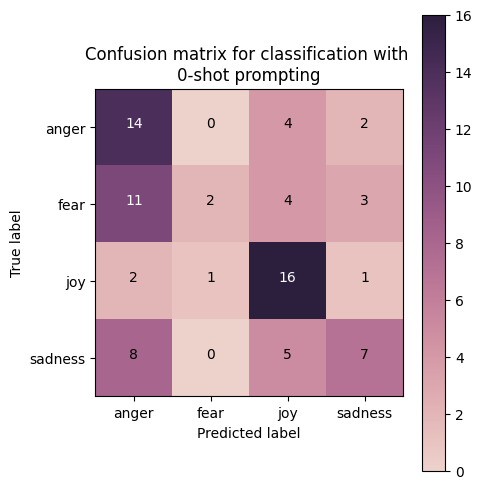

In [52]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: British humour should offend and challenge mainstream views. Hat off to Clarkeson. The ultra left should go and kneel before Allah!!
Class: anger

Text: I get soooo nervous when an actually attractive guy tries to talk to me in person. Like 9/10 I turn him down just from habit 😭
Class: fear

Text: Had a coworker look at her phone and say, cheerfully, 'oh look, Kap's getting death threats now.' 🙄. Then she goes to say the 49ers are
Class: joy

Text: Season 3 of penny dreadful is on Netflix...well my afternoon is filled
Class: sadness




Processing samples for emotion: anger...:  55%|█████▌    | 11/20 [00:07<00:06,  1.47it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 8.369056202s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:25<00:11,  2.27s/it]

Rate limit of 15 requests per minute reached. Waiting for 34.03 seconds.


Processing samples for emotion: fear...:  30%|███       | 6/20 [00:04<00:10,  1.33it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 7.492109177s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:22<00:24,  2.45s/it]

Rate limit of 15 requests per minute reached. Waiting for 32.54 seconds.


Processing samples for emotion: joy...:   5%|▌         | 1/20 [00:00<00:17,  1.10it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 7.305273912s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: joy...:  10%|█         | 2/20 [00:01<00:16,  1.07it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 6.3556143s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:19<00:53,  3.54s/it]

Rate limit of 15 requests per minute reached. Waiting for 32.53 seconds.


Processing samples for emotion: joy...:  90%|█████████ | 18/20 [01:02<00:02,  1.06s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 5.85462942s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 32.92 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:43<00:03,  1.45it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.19 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:37<00:00,  4.85s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 56.25%
              precision    recall  f1-score   support

       anger       0.48      0.75      0.59        20
        fear       0.71      0.25      0.37        20
         joy       0.64      0.80      0.71        20
     sadness       0.53      0.45      0.49        20

    accuracy                           0.56        80
   macro avg       0.59      0.56      0.54        80
weighted avg       0.59      0.56      0.54        80



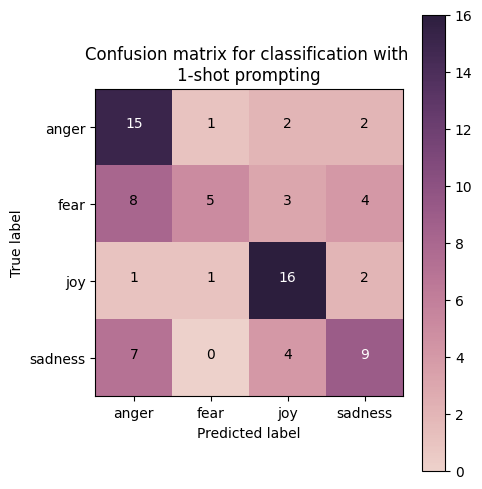

In [53]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: British humour should offend and challenge mainstream views. Hat off to Clarkeson. The ultra left should go and kneel before Allah!!
Class: anger

Text: @mdivincenzo9 he's stupid, I hate him lol 
Class: anger

Text: I'll happily be rude to people who personally insult me unprovoked, they deserve it 👍 Just as good people deserve respect
Class: anger

Text: @everycolorbot more like every color looks the same #triggered #colorblind #offended
Class: anger

Text: #firsttweetever sippin #hotchocolate wondering #why I finally gave in &lt;3 haha #hellloooootwitter - ...its because #facebookisforfamily 
Class: anger

Text: I get soooo nervous when an actually attractive guy tries to talk to me in person. Like 9/10 I turn him down just from habit 😭
Class: fear

Text: Still salty about that fire alarm

Processing samples for emotion: anger...:  50%|█████     | 10/20 [00:07<00:07,  1.35it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 4.517672145s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: anger...:  60%|██████    | 12/20 [00:09<00:06,  1.23it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 2.742699682s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:26<00:15,  3.00s/it]

Rate limit of 15 requests per minute reached. Waiting for 33.07 seconds.


Processing samples for emotion: fear...:  40%|████      | 8/20 [00:06<00:10,  1.19it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 1.132675908s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:23<00:40,  4.05s/it]

Rate limit of 15 requests per minute reached. Waiting for 32.47 seconds.


Processing samples for emotion: joy...:  10%|█         | 2/20 [00:01<00:11,  1.53it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 2.171048184s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:19<00:53,  3.56s/it]

Rate limit of 15 requests per minute reached. Waiting for 32.07 seconds.


Processing samples for emotion: joy...:  80%|████████  | 16/20 [01:00<00:04,  1.01s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 3.451841502s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 33.43 seconds.


Processing samples for emotion: sadness...:  70%|███████   | 14/20 [00:44<00:05,  1.11it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 1.402950317s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': 

Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:26,  5.38s/it]

Rate limit of 15 requests per minute reached. Waiting for 33.57 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:37<00:00,  4.90s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 58.75%
              precision    recall  f1-score   support

       anger       0.54      0.70      0.61        20
        fear       0.62      0.25      0.36        20
         joy       0.65      0.75      0.70        20
     sadness       0.57      0.65      0.60        20

    accuracy                           0.59        80
   macro avg       0.60      0.59      0.57        80
weighted avg       0.60      0.59      0.57        80



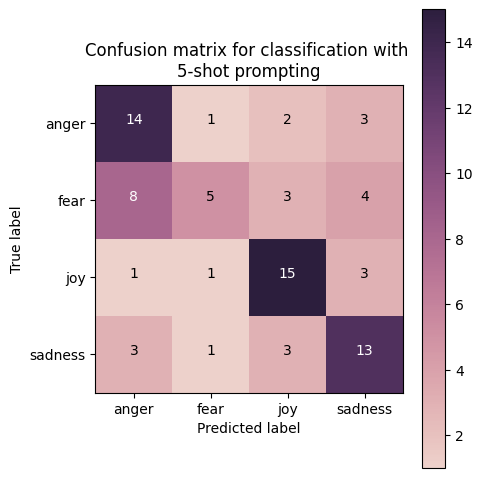

In [54]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [55]:
# Answer here
# Answer below using markdown

### **Comparison and Discussion of Zero-Shot, 1-Shot, and 5-Shot Classification Results**

#### **1. Overall Performance Trend**

Across the three settings, the performance improves as the number of shots increases.
As seen from the results: more shots → the model better understands the classification logic → more accurate predictions.

* Zero-shot: Most unstable, the model relies purely on its pretrained knowledge.

* 1-shot: Adding one example per emotion noticeably improves predictions for fear and anger.

* 5-shot: The most stable overall, with significant improvement especially in the anger category.

#### **2. Problems**

The fear category remains the most difficult emotion overall, with frequent confusion between anger and joy. The model still shows a tendency to collapse multiple negative emotions into similar predictions, suggesting that semantic boundaries between negative emotional expressions are not fully captured. Moreover, even with 5-shot prompting, sadness continues to be partially confused with anger due to shared wording patterns in social-media style texts. These limitations indicate that prompt examples alone cannot fully resolve category overlap.

#### **3. Improvement**

* Providing higher-quality few-shot examples, especially those that highlight the distinction between fear vs. anger, could strengthen category boundaries.

* Incorporating longer context windows or emotion-specific linguistic cues into prompts may help the model better understand subtle sentiment differences.

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [56]:
# Answer here
base_dir = "./results/llm_classification_results"

# load csv
df_0 = pd.read_csv(os.path.join(base_dir, "results_samples_20_shots_0.csv"))
df_1 = pd.read_csv(os.path.join(base_dir, "results_samples_20_shots_1.csv"))
df_5 = pd.read_csv(os.path.join(base_dir, "results_samples_20_shots_5.csv"))

# rename prediction emotion label 
df_0 = df_0.rename(columns={"predicted_emotion": "pred_0"})
df_1 = df_1.rename(columns={"predicted_emotion": "pred_1"})
df_5 = df_5.rename(columns={"predicted_emotion": "pred_5"})

# align outputs (text + emotions)
df_merged = (
df_0[["text", "true_emotion", "pred_0"]]
.merge(df_1[["text", "true_emotion", "pred_1"]], on=["text", "true_emotion"])
.merge(df_5[["text", "true_emotion", "pred_5"]], on=["text", "true_emotion"])
)

# Improved case
improved_mask = ((df_merged["pred_0"] != df_merged["true_emotion"]) & ((df_merged["pred_1"] == df_merged["true_emotion"]) | (df_merged["pred_5"] == df_merged["true_emotion"])))
df_improved = df_merged[improved_mask]

# Never improved case
no_improve_mask = ((df_merged["pred_0"] != df_merged["true_emotion"]) & (df_merged["pred_1"] != df_merged["true_emotion"]) & (df_merged["pred_5"] != df_merged["true_emotion"]))
df_no_improve = df_merged[no_improve_mask]

# Got worsed case
worse_mask = ((df_merged["pred_0"] == df_merged["true_emotion"]) &((df_merged["pred_1"] != df_merged["true_emotion"]) | (df_merged["pred_5"] != df_merged["true_emotion"])))
df_worse = df_merged[worse_mask]

# Print results
print(df_improved.head(), "\n")
print(df_no_improve.head(), "\n")
print(df_worse.head(), "\n")

# Save as CSV
df_improved.to_csv(os.path.join(base_dir, "cases_improved.csv"), index=False)
df_no_improve.to_csv(os.path.join(base_dir, "cases_no_improve.csv"), index=False)
df_worse.to_csv(os.path.join(base_dir, "cases_worse.csv"), index=False)

                                                 text true_emotion   pred_0  \
6                  Eat my ass' is no longer an insult        anger      joy   
19   @LeonWobYP b***er off. NCFC is a grudge match :)        anger      joy   
26  also i had an awful nightmare involving being ...         fear  sadness   
28  If my concerns &amp; anxiety don't matter to y...         fear    anger   
35  The moment you bring her to meet your best fri...         fear      joy   

   pred_1 pred_5  
6   anger  anger  
19  anger  anger  
26   fear   fear  
28   fear   fear  
35   fear   fear   

                                                 text true_emotion   pred_0  \
2   I think @Sam_Canaday &amp; @KYLEJDOWSON must a...        anger  sadness   
3   @LaureEve I am sitting here wrapped in a fluff...        anger      joy   
8      @__NETFLIXNCHILL I fuck with madden way harder        anger      joy   
14  I miss my gran singing Rawhide, in her deep ba...        anger  sadness   
21  Nothing wo

### **Findings**

#### 1. Improved Cases — Examples Provide Useful Semantic Framing

This improvement occurs because the examples help the LLM better recognize emotion-specific linguistic patterns. Demonstrations clarify category boundaries, especially between semantically similar emotions such as anger vs. sadness or fear vs. sadness. Thus, few-shot prompting provides an effective semantic scaffold that guides the model toward the correct label.

#### 2. No Improvement — Examples Do Not Address the Model’s Semantic Gaps

These failures commonly appear in the anger category, suggesting that the examples may not sufficiently cover the full diversity of how anger is expressed. Texts with implicit emotion, sarcasm, weak cues, or ambiguous context remain difficult for the model, and few-shot prompting cannot compensate when the examples lack coverage or the text’s emotional signal is too subtle. In these cases, model errors persist due to intrinsic ambiguity or insufficient representativeness in the examples.

#### 3. Worse Cases — Examples Introduce Bias or Misleading Patterns

This happens when the LLM overfits the linguistic style of the examples, causing it to prioritize example, like phrasing over the actual input. If the examples disproportionately emphasize certain emotional cues, the model may generalize incorrectly and shift ambiguous texts into the wrong category. This demonstrates a classic few-shot limitation: poor or overly narrow examples can misguide the model more than having no examples at all.

#### 4. Conclusion

The results show that few-shot prompting can improve classification when examples provide diverse and accurate semantic cues. However, when examples lack coverage or introduce stylistic or category bias—the model may fail to improve or even perform worse. 

**Ultimately, the quality and representativeness of examples matter far more than the number of examples.**

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---